- Different hyperparameters
- Class 4 and 6?
- Kernelized SVM?
- ROC Curve, CM, F1-Score and other metric

In [1]:
from datamodule import Dataset
import numpy as np
from trainer import Trainer
from models import LogisticRegression, SoftmaxRegression, Classifier
from sklearn.discriminant_analysis import StandardScaler
import warnings
warnings.filterwarnings("ignore")

## Dataset Creation

In [4]:
dataset = Dataset(path = './data/dataset2.csv')
dataset.summarize()

N Examples: 50000
N Inputs: 1000
N Classes: 10
Classes: [0 1 2 3 4 5 6 7 8 9]
 - Class 0: 5000 (10.0)
 - Class 1: 5000 (10.0)
 - Class 2: 5000 (10.0)
 - Class 3: 5000 (10.0)
 - Class 4: 5000 (10.0)
 - Class 5: 5000 (10.0)
 - Class 6: 5000 (10.0)
 - Class 7: 5000 (10.0)
 - Class 8: 5000 (10.0)
 - Class 9: 5000 (10.0)


In [3]:
indices = np.where(np.isin(dataset.y, [0,1]))[0]
newY = dataset.y[indices]
newX = dataset.X[indices]
dataset = Dataset(X = newX, y = newY)

In [4]:
# # Calculate mean and standard deviation along each feature (column)
# # mean = torch.mean(dataset.X, axis=0)
# # std_dev = torch.std(dataset.X, axis=0)
# # # Normalize the input data
# # normalized_X = (dataset.X - mean) / std_dev


# # Create a StandardScaler object
# scaler = StandardScaler()
# # Fit the scaler on the input data and transform it
# normalized_X = scaler.fit_transform(dataset.X)

# dataset = Dataset(X = normalized_X, y = dataset.y)

## Training 

In [8]:
trainer = Trainer(max_epochs = 25)
model = LogisticRegression(num_features = dataset.num_features, num_classes = dataset.num_classes, lr = 0.001)
trainer.fit(model = model, data = dataset)

tensor(4.0216)
tensor(3.8571)
tensor(3.9244)
tensor(3.3115)
tensor(3.2561)
tensor(2.7033)
tensor(3.4915)
tensor(2.8207)
tensor(2.4186)
tensor(2.9214)
tensor(2.4399)
tensor(1.6997)
tensor(1.5509)
tensor(2.5174)
tensor(1.7411)
tensor(1.5375)
tensor(1.7474)
tensor(1.3088)
tensor(1.0511)
tensor(1.0359)
tensor(1.1065)
tensor(0.8620)
tensor(0.8029)
tensor(0.7310)
tensor(0.8495)
tensor(0.4785)
tensor(0.4162)
tensor(0.5576)
tensor(0.3900)
tensor(0.4338)
tensor(0.3406)
tensor(0.3080)
tensor(0.2557)
tensor(0.2187)
tensor(0.3780)
tensor(0.2022)
tensor(0.2025)
tensor(0.1965)
tensor(0.2079)
tensor(0.1872)
tensor(0.2421)
tensor(0.3020)
tensor(0.1513)
tensor(0.2534)
tensor(0.1656)
tensor(0.1368)
tensor(0.1473)
tensor(0.1880)
tensor(0.1179)
tensor(0.1490)
tensor(0.1239)
tensor(0.1366)
tensor(0.0911)
tensor(0.1849)
tensor(0.1582)
tensor(0.1748)
tensor(0.1431)
tensor(0.1744)
tensor(0.1036)
tensor(0.1235)
tensor(0.1074)
tensor(0.1554)
tensor(0.0988)
tensor(0.1071)
tensor(0.0886)
tensor(0.1312)
tensor(0.0

<Figure size 500x400 with 0 Axes>

In [6]:
# classifier
clf = Classifier('S')
clf.fit(dataset.X_train, dataset.y_train)
# evaluation against test set
clf.accuracy(dataset.X_test, dataset.y_test)

tensor(0.9990)

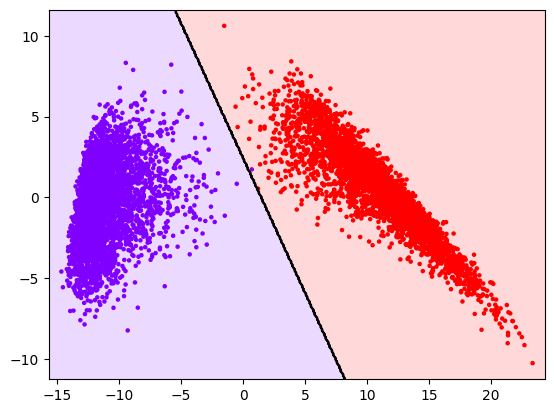

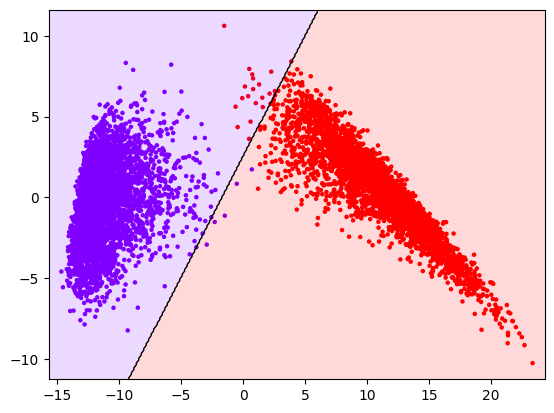

In [7]:
from utils import plot
plot(dataset, clf)
plot(dataset, model)